# CS178 Homework 1 
### Due: Wednesday, January 18 2023 (11:59 PM)

---
## Instructions

Welcome to CS 178!


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to modify these starter Jupyter notebooks to complete your assignment and to write your report. You may add additional cells (containing either code or text) as needed. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

Several problems in this assignment require you to create plots. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`. Unless you are told otherwise, you should call `pyplot` plotting functions with their default arguments.
 
If you have any questions/concerns about the homework problems or using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Exploring a NYC Housing Dataset (25 points)
    - Problem 1.1: Numpy Arrays (5 points)
    - Problem 1.2: Feature Statistics (5 points)
    - Problem 1.3: Histograms (5 points)
    - Problem 1.4: Scatter Plots (10 points)
- Problem 2: Nearest Centroid Classifiers on MNIST (40 points)
    - Problem 2.1: Visualizing MNIST (5 points)
    - Problem 2.2: Implementing Nearest Centroids (20 points)
    - Problem 2.3: Evaluating Nearest Centroids (15 points)
- Problem 3: kNN Classifiers on NYC-Housing (30 points)
    - Problem 3.1: Plot decision boundary for various k (15 points)
    - Problem 3.2: Plot tr/te error for various k (15 points)
- Statement of Collaboration (5 points)

---
## Problem 1: Exploring a NYC Housing Dataset

In this problem, you will explore some basic data manipulation and visualizations with a small dataset of real estate prices from NYC. For every datapoint, we are given several real-valued features which will be used to predict the target variable, y, representing in which borough the property is located. Let's first load in the dataset by running the code cell below:

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=123`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import requests           # we'll use these for reading data from a url
from io import StringIO

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 123
np.random.seed(seed)  

In [4]:
# Load the features and labels from an online text file
url = 'https://sli.ics.uci.edu/extras/cs178/data/nyc_housing.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    nych = np.genfromtxt(datafile,delimiter=None)
    nych_X, nych_y = nych[:,:-1], nych[:,-1]

### Problem 1.1 (5 points): Numpy Arrays

The variable `nych_X` is a numpy array containing the feature vectors in our dataset, and `nych_y` is a numpy array containing the corresponding labels.

- What is the shape of `nych_X` and `nych_y`? ([Hint](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html))
- How many datapoints are in our dataset, and how many features does each datapoint have? 
- How many different classes (i.e. labels)  are there? 
- Print rows 3, 4, 5, and 6 of the feature matrix and their corresponding labels. Since Python is zero-indexed, we will count our rows starting at zero -- for example, by "row 0" we mean `nych_X[0, :]`, and "row 1" means `nych_X[1, :]`, etc. (Hint: you can do this in two lines of code with slicing).


In [97]:
#1
print("#1")
print(nych_X.shape)
print(nych_y.shape)

#2
print("#2")

#how many datapoints
print(nych_y.size)
#how many features each datapoint have
num_rows, num_cols = nych_X.shape
print(num_cols)

#3
print("#3")
print(nych.ndim)

#4
print("#4")

#features
print(nych_X[3:7])
#labels
print(nych_y[3:7])

#1
(300, 3)
(300,)
#2
300
3
#3
2
#4
[[  16.26956503   23.3778248  1922.        ]
 [  16.14859574   22.52850371 1929.        ]
 [  15.86570911   22.68645607 1936.        ]
 [  12.01367161   18.4169954  1925.        ]]
[1. 1. 1. 1.]


### Problem 1.2 (5 points): Feature Statistics

Let's compute some statistics about our features. You are allowed to use `numpy` to help you with this problem -- for example, you might find some of the `numpy` functions listed [here](https://numpy.org/doc/stable/reference/routines.statistics.html) or [here](https://numpy.org/doc/stable/reference/routines.math.html) useful.

- Compute the mean, variance, and standard deviation of each feature.
- Compute the minimum and maximum value for each feature.

Make sure to print out each of these values, and indicate clearly which value corresponds to which computation.

In [96]:
#1
print("#1")
#Mean
print(np.mean(nych_X, axis = 0))
#Variance
print(np.var(nych_X, axis = 0))
#Standard Deviation
print(np.std(nych_X, axis = 0))

#2
print("#2")
#Min
print(np.min(nych_X, axis = 0))
#Max
print(np.max(nych_X, axis = 0))

#1
[  14.11839244   21.90711618 1946.35333333]
[   6.60022489    8.87192988 1253.08182222]
[ 2.56909028  2.9785785  35.39889578]
#2
[  10.36632221   16.87267488 1893.        ]
[  20.15271438   29.12386138 2014.        ]


### Problem 1.3 (5 points):  Feature Histograms

Now, you will visualize the distribution of each feature with histograms.  Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every feature in `nych_X`, plot a histogram of the values of the feature. Your plot should consist of a grid of subplots with 1 row and 4 columns.
- Include a title above each subplot to indicate which feature we are plotting. For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc.

Some starter code is provided for you below. (Hint: `axes[0].hist(...)` will create a histogram in the first subplot.)

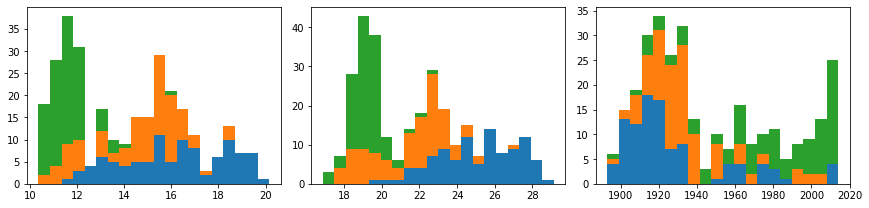

In [124]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3)) 

#num_row, num_col = nych_X.shape

for i in range(0,1):
    for j in range(0,3):
        axes[j].hist([nych_X[nych_y == c, j] for c in np.unique(nych_y)], bins = 20, histtype = 'barstacked')
        
fig.tight_layout()

### Problem 1.4 (10 points): Feature Scatter Plots

To help further visualize the NYC-Housing datset, you will now create several scatter plots of the features. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every pair of features in `nych_X`, plot a scatter plot of the feature values, colored according to their labels. For example, plot all data points with $y=0$ as blue, $y=1$ as green, etc. Your plot should be a grid of subplots with 4 rows and 4 columns. (Hint: `axes[0, 0].scatter(...)` will create a scatter plot in the first column and first row).
- Include an x-label and a y-label on each subplot to indicate which features we are plotting.  For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc. (Hint: `axes[0, 0].set_xlabel(...)` might help you with the first subplot.) 

Some starter code is provided for you below.

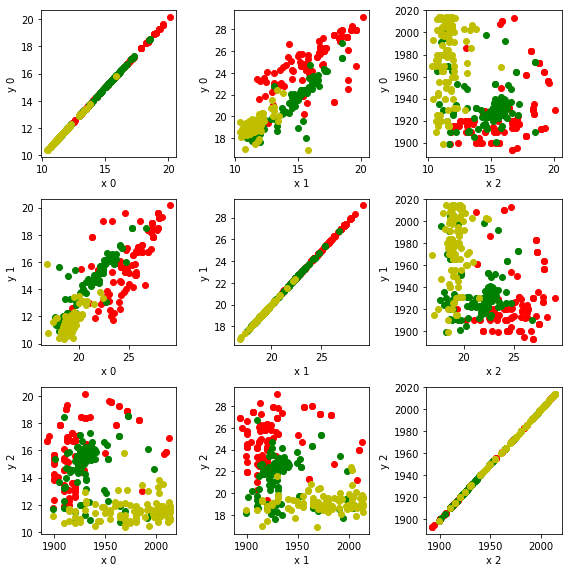

In [122]:
# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  

### YOUR CODE STARTS HERE ###

colors = ['r', 'g', 'y']
for i in range(0, 3):
    for j in range(0, 3):
        axes[i, j].set_xlabel('x %d' % j)
        axes[i, j].set_ylabel('y %d' % i)
        for c in np.unique(nych_y):
            axes[i, j].plot(nych_X[nych_y == c, i], nych_X[nych_y == c, j],
                               'o', color = colors[int(c)])

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

---
## Problem 2: Nearest Centroid Classifiers

In this problem, you will implement a nearest centroid classifier and train it on the MNIST dataset. The MNIST dataset is an image dataset consisting of 70,000 hand-written digits (from 0 to 9), each of which is a 28x28 grayscale image. For each image, we also have a label, corresponding to which digit is written. Run the following code cell to load the MNIST dataset:

In [61]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
mnist_X, mnist_y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# Convert labels to integer data type
mnist_y = mnist_y.astype(int)

In the following cell, we split the MNIST dataset into training and testing sets -- 75% of the data is used for training, and 25% is used for testing. The function `train_test_split` is provided by scikit-learn, and will automatically shuffle our data for us if we use the flag `shuffle=True`. 

**NOTE:** For this homework, do not alter the flag `random_state=seed`, as this is necessary for obtaining reproducible results.

In [62]:
mnist_X_tr, mnist_X_te, mnist_y_tr, mnist_y_te = train_test_split(mnist_X, mnist_y, 
                                                                  test_size=0.25, random_state=seed, shuffle=True)

###  Problem 2.1 (5 points): MNIST Visualization
Let's begin by visualizing a few of the images in the MNIST dataset. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- Plot the first 9 images in `mnist_X_tr`. Your plot should contain a total of 9 subplots arranged in a grid with 3 rows and 3 columns. ([Hint 1](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) [Hint 2](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html))
- Include a title for each subplot indicating the label of the image.

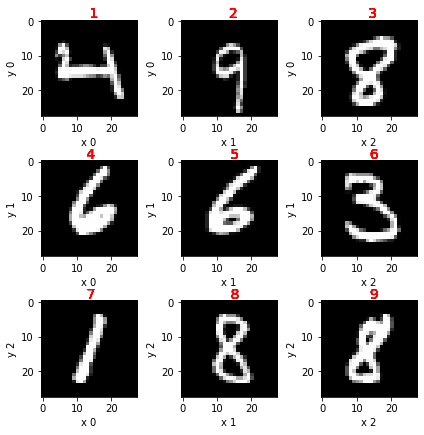

In [148]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
k = 0
#cc = np.shape(mnist_X_tr)
for i in range(3):
    for j in range(3):
        axes[i, j].set_xlabel('x %d' % j)
        axes[i, j].set_ylabel('y %d' % i)
        
        a = np.reshape(mnist_X_tr[k], (28, 28))
        axes[i, j].imshow(a)
        
        plt.figtext(0.5, 1, "         1                             2                             3", ha="center", va="top", fontsize=14, color="r")
        plt.figtext(0.5, 0.675, "         4                              5                             6", ha="center", va="top", fontsize=14, color="r")
        plt.figtext(0.5, 0.35, "         7                              8                             9", ha="center", va="top", fontsize=14, color="r")
        k += 1
        
###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

### Problem 2.2 (20 points): Implementing a Nearest Centroid Classifier

In the code given below, we define the class `NearestCentroidClassifier` which has an unfinished implementation of a nearest centroid classifier. For this problem, you will complete this implementation. Your nearest centroid classifier will use the Euclidean distance (see Note Set 1 on Canvas), which is defined for two feature vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ as

$$d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{\sum_{j=1}^d (x_{1j} - x_{2j})^2}. $$

- Implement the method `fit`, which takes in an array of features `X` and an array of labels `y` and trains our classifier. You should store your computed centroids in the list `self.centroids`.
- Test your implementation of `fit` by training a `NearestCentroidClassifier` on the MNIST training set, and using the provided method `plot_centroids` to visualize the centroids. If your implementation is correct, the centroids should resemble the corresponding class label in the plot.
- Implement the method `predict`, which takes in an array of feature vectors `X` and predicts their class labels based on the centroids you computed in the method `fit`.
- Print the predicted labels (using your `predict` function) and the true labels for the first ten images in the MNIST testing set. Make sure to indicate which are the predicted labels and which are the true labels.

You are allowed to modify the given code as necessary to complete the problem, e.g. you may create helper functions. 

In [210]:
import math
class NearestCentroidClassifier:
    def __init__(self):
        # A list containing the centroids; to be filled in with the fit method.
        self.centroids = []
        
    def plot_centroids(self):
        # Create a figure with 2 rows and 5 columns
        figure, axes = plt.subplots(2, 5, figsize=(12, 4))  
        
        # Plot the centroids -- MNIST has 10 classes, so you should have 10 centroids
        for i in range(10):
            axes[i//5, i%5].imshow(self.centroids[i].reshape(28, 28))
            axes[i//5, i%5].set_title(f'Label: {i}')
        
        plt.tight_layout()
        plt.show()
        
        
    def fit(self, X, y):
        """ Fits the nearest centroid classifier with training features X and training labels y.
        
        X: array of training features; shape (n, d), where n is the number of datapoints,
            and d is the number of features.
        y: array training labels; shape (n, ), where n is the number of datapoints.
        
        """

        # Hint: you should append to self.centroids with the corresponding centroids.
        n = len(X)
        d = len(X[0])
        class_no = 10
        centroidict = {}
        mean_dict = {}
        for i in range(n):
            if y[i] not in centroidict.keys():
                centroidict[y[i]] = np.empty(0)
                centroidict[y[i]] = np.append(centroidict[y[i]], X[i])
            else:
                centroidict[y[i]] = np.append(centroidict[y[i]], X[i])
        for key, value in centroidict.items():
            if key not in mean_dict.keys():
                mean_dict[key] = np.empty(0)  
                value = np.reshape(value, (int(len(value)/d), d))
                for i in range(d):
                    mean_dict[key] = np.append(mean_dict[key], np.mean(value[:, i]))
                
        centroid_set = sorted([(k, v) for k, v in mean_dict.items()], key = lambda k: k[0])
        
        for v in centroid_set:
            self.centroids.append(v[1])
        
                    
    def predict(self, X):
        """ Makes predictions with the nearest centroid classifier on the features in X.
        
        X: array of features; shape (n, d), where n is the number of datapoints,
            and d is the number of features.
        
        Returns:
        y_pred: a numpy array of predicted labels; shape (n, ), where n is the number of datapoints.
        """
        ### YOUR CODE STARTS HERE ###
        y_pred = []
        n = len(X)
        d = len(X[0])
        
        for i in range(n):
            current_prediction = float('-inf')
            current_sum = float('inf')
            for j in range(len(self.centroids)):
                temp = 0
                for k in range(d):
                    temp += (X[i][k] - self.centroids[j][k])**2
                sqrt_sum = math.sqrt(temp)
                if sqrt_sum < current_sum:
                    current_prediction = j
                    current_sum = sqrt_sum
                y_pred.append(current_prediction)



        ###  YOUR CODE ENDS HERE  ###
        
        return y_pred


Here is some code illustrating how to use your `NearestCentroidClassifier`. You can run this code to fit your classifier and to plot the centroids. You should write your implementation above such that you don't need to modify the code in the next cell.

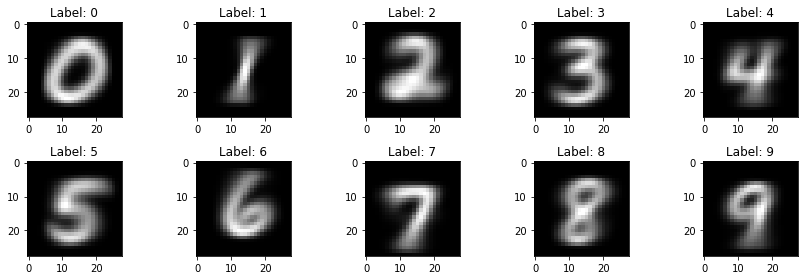

In [212]:
nc_classifier = NearestCentroidClassifier()  # Create a NearestCentroidClassifier object
nc_classifier.fit(mnist_X_tr, mnist_y_tr)    # Fit to the MNIST training data
nc_classifier.plot_centroids()               # Plot the resulting centroids

In [213]:
# Print the predicted and true labels for the first ten images in the MNIST testing set
### YOUR CODE STARTS HERE ###
print(f"prediction: {nc_classifier.predict(mnist_X_te[:10])}")
print(f"actual values: {mnist_y_te[:10]}")



###  YOUR CODE ENDS HERE  ###

prediction: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 5, 5, 7, 7, 9, 0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 4, 4, 4, 7, 7, 7, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 1, 2, 2, 2, 2, 6, 6, 6, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3]
actual values: [0 9 4 9 5 6 1 3 1 3]


### Problem 2.3 (10 points): Evaluating the Nearest Centroids Classifier

Now that you've implemented the nearest centroid classifier, it is time to evaluate its performance.

- Write a function `compute_accuracy` that computes the accuracy of a model's predictions. That is, your function should take in an array of true labels y and an array of predicted labels `y_pred`, and return the accuracy of the predictions. You may use `numpy` to help you do this, but do not use `sklearn` or any other machine learning libraries.
- Write a function `compute_confusion_matrix` that computes the confusion matrix of a model's predictions. That is, your function should  take in an array of true labels `y`and an array of predicted labels `y_pred`, and return the corresponding $C \times C$ confusion matrix as a numpy array, where $C$ is the number of classes. You may use `numpy` to help you do this, but do not use `sklearn` or any other machine learning libraries.
- Verify that your implementations of `NearestCentroidClassifier`, `compute_accuracy`, and `compute_confusion_matrix` are correct. To help you do this, you are given the functions `eval_sklearn_implementation` and `eval_my_implementation`. The function `eval_sklearn_implementation` will use the relevant `sklearn` implementations to compute the accuracy and confusion matrix of a nearest centroid classifier. The function `eval_my_implementation` will do the same, but for your implementations. If your code is correct, the outputs of the two functions should be the same.

In [214]:
def compute_accuracy(y, y_pred):
    """ Computes the accuracy of an array of predictions.
    
    y: true labels; shape (n, ), where n is the number of datapoints.
    y_pred: predicted labels; shape (n, ), where n is the number of datapoints.
    
    Returns:
    accuracy: the accuracy of y_pred compared to y; scalar expressed as a decimal (e.g. 0.5)
    """
    ### YOUR CODE STARTS HERE ###
    
    counter_num = len(y)
    counter_denum = 0
    
    for i in range(counter_num):
        if y[i] == y_pred[i]:
            counter_denum += 1
    return counter_denum / counter_num




    ###  YOUR CODE ENDS HERE  ###
    
    return accuracy


In [215]:
def compute_confusion_matrix(y, y_pred):
    """ Computes the confusion matrix of an array of predictions.
    
    y: true labels; shape (n, ), where n is the number of datapoints.
    y_pred: predicted labels; shape (n, ), where n is the number of datapoints.
    
    Returns:
    confusion_matrix: a numpy array corresponding to the confusion matrix from y and y_pred; shape (C, C), 
        where C is the number of unique classes.
    """
    
    ### YOUR CODE STARTS HERE ###
    #confusion_matrix = np.zeros([10, 10])
    confusion_matrix = np.empty([10, 10])
    
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            confusion_matrix[y[i]][y_pred[i]] += 1
    
    ###  YOUR CODE ENDS HERE  ###
    
    return confusion_matrix
    

You can run the two code cells below to compare your answers to the implementations in `sklearn`. If your answers are correct, the outputs of these two functions should be the same. Do not modify the functions `eval_sklearn_implementation` and `eval_my_implementation`, but make sure that you read and understand this code.

Sklearn Results:
--- Accuracy (train): 0.8109333333333333
--- Accuracy (test): 0.8071428571428572


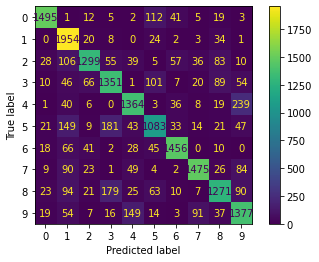

In [216]:
###############################################
### Results with the sklearn implementation ###
###############################################

def eval_sklearn_implementation(X_tr, y_tr, X_te, y_te):
    # Nearest centroid classifier implemented in sklearn
    sklearn_nearest_centroid = NearestCentroid()

    # Fit on training dataset
    sklearn_nearest_centroid.fit(X_tr, y_tr)

    # Make predictions on training and testing data
    sklearn_y_pred_tr = sklearn_nearest_centroid.predict(X_tr)
    sklearn_y_pred_te = sklearn_nearest_centroid.predict(X_te)

    # Evaluate accuracies using the sklearn function accuracy_score
    sklearn_acc_tr = accuracy_score(y_tr, sklearn_y_pred_tr)
    sklearn_acc_te = accuracy_score(y_te, sklearn_y_pred_te)

    print(f'Sklearn Results:')
    print(f'--- Accuracy (train): {sklearn_acc_tr}')
    print(f'--- Accuracy (test): {sklearn_acc_te}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
    sklearn_cm = confusion_matrix(y_te, sklearn_y_pred_te)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot();
    
    
# Call the function    
eval_sklearn_implementation(mnist_X_tr, mnist_y_tr, mnist_X_te, mnist_y_te)

Your Results:
--- Accuracy (train): 0.10331428571428572
--- Accuracy (test): 0.10022857142857143


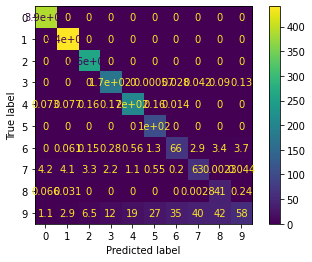

In [217]:
#########################################
### Results with your implementation ###
#########################################

def eval_my_implementation(X_tr, y_tr, X_te, y_te):
    # Now test your implementation of NearestCentroidClassifier
    nearest_centroid = NearestCentroidClassifier()

    # Fit on training dataset
    nearest_centroid.fit(X_tr, y_tr)

    # Make predictions on training and testing data
    y_pred_tr = nearest_centroid.predict(X_tr)
    y_pred_te = nearest_centroid.predict(X_te)

    # Evaluate accuracies using your function compute_accuracy
    acc_tr = compute_accuracy(y_tr, y_pred_tr)
    acc_te = compute_accuracy(y_te, y_pred_te)

    print(f'Your Results:')
    print(f'--- Accuracy (train): {acc_tr}')
    print(f'--- Accuracy (test): {acc_te}')

    # Evaluate confusion matrix using your function compute_confusion_matrix
    cm = compute_confusion_matrix(y_te, y_pred_te)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot();
    

# Call the function
eval_my_implementation(mnist_X_tr, mnist_y_tr, mnist_X_te, mnist_y_te)

---
## Problem 3: kNN

For the final problem of this homework, you will explore the kNN algorithm using the NYC-Housing dataset. You will use the `sklearn` implementation of kNN for this problem.

### Problem 3.1: Decision Boundaries (15 points)
- Adapt the code given in Problem 1 and Problem 2 to create a train/test split of the NYC-Housing dataset containing only the first two features (i.e. feature 0 and feature 1). Use 75% of the data for training, and 25% of the data for testing. Set `shuffle=True` and be sure to use `random_state=seed`.
- For the values of `k = [1, 5, 10, 50]`, fit a kNN classifier on this new training set with each value for `k` and plot the resulting decision boundary. Some starter code is given below for you to use -- you only need to modify the lines with `# TODO`. Your plot should be have 4 subplots total, arranged in 2 rows and 2 columns.
- Write a short description of what you see happen as you increase the value of `k`.

Here are a few tips to help you get started.
- In `sklearn`, you can create a kNN classifier with `k` neighbors via `knn = KNeighborsClassifier(n_neighbors=k)`.
- You can then use `knn.fit(...)` and `knn.predict(...)` to fit the classifier and make predictions with it.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for the corresponding documentation.

In [218]:
# Re-load the features and labels in the NYC-Housing dataset (if necessary)
url = 'https://sli.ics.uci.edu/extras/cs178/data/nyc_housing.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    nych = np.genfromtxt(datafile,delimiter=None)
    nych_X, nych_y = nych[:,:-1], nych[:,-1]

In [222]:
# Create a 75%/25% train/test split using only the first two features in nych_X
### YOUR CODE STARTS HERE ###
nych_X = nych_X[:, :2]
nych_X_tr2, nych_X_te, nych_y_tr2, nych_y_te = train_test_split(nych_X, nych_y, 
                                                                  test_size=0.25, random_state=seed, shuffle=True)


###  YOUR CODE ENDS HERE  ###

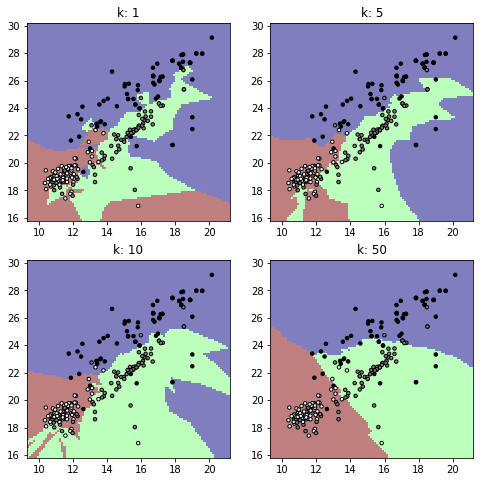

In [224]:
# Plot the decision boundaries for the kNN classifiers for various values of k

# Some keyword arguments for making nice looking plots.
plot_kwargs = {'cmap': 'jet',     # also: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}


# Create a figure with 2 rows and 2 columns
figure, axes = plt.subplots(2, 2, figsize=(8, 8))

### YOUR CODE STARTS HERE ###

k_vals = [1, 5, 10, 50]
for i, k in enumerate(k_vals):
    knn =    KNeighborsClassifier(n_neighbors=k)
    knn.fit(nych_X_tr2, nych_y_tr2)
    
    # Plot the resulting decision boundary for knn 
    DecisionBoundaryDisplay.from_estimator(knn, nych_X_tr2, ax=axes[i//2, i%2], **plot_kwargs)
    
    # Scatter plot of the training data
    axes[i//2, i%2].scatter(nych_X_tr2[:, 0], nych_X_tr2[:, 1], c=nych_y_tr2, edgecolor='k', s=12)
    # Set the title of each subplot
    axes[i//2, i%2].set_title(f'k: {k}')
    
###  YOUR CODE ENDS HERE  ###

### Problem 3.2: Error Rates vs k  (15 points)

Now, we will vary the value of $k$ and see what effect this has on the accuracy of our predictions.

- Again using only the first two features in the NYC-Housing dataset, compute the error rate on both the training and testing data as a function of `k`. Do this for all values of `k = [1, 2, 5, 10, 50, 100, 110]`. You may use your own implementation of the accuracy from Problem 2.3, or the scikit-learn function `sklearn.metrics.accuracy_score`.
- Plot the resulting error rate functions using a semi-log plot (i.e. the x-axis is on a logarithmic scale), with the training error in red and the validation error in green. This can be done using `axes[0].semlilogx(...)`. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.
- What value of `k` would you recommend, and why?

accuracy for k = 1: 0.76
accuracy for k = 2: 0.8133333333333334
accuracy for k = 5: 0.8266666666666667
accuracy for k = 10: 0.8133333333333334
accuracy for k = 50: 0.7466666666666667
accuracy for k = 100: 0.7466666666666667
accuracy for k = 110: 0.7333333333333333


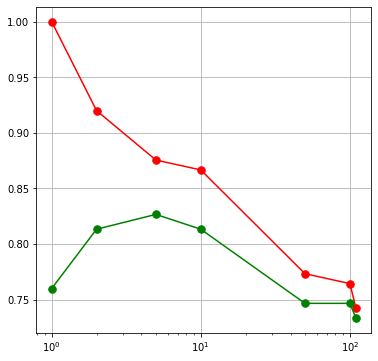

In [259]:
import sklearn
# Create a figure with only one subplot
figure, axes = plt.subplots(1, figsize=(6, 6))

### YOUR CODE STARTS HERE ###

k_vals = [1, 2, 5, 10, 50, 100, 110]
train_errors = []
validation_error = []
for i, k in enumerate(k_vals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nych_X_tr2, nych_y_tr2)
    train_errors.append(knn.score(nych_X_tr2, nych_y_tr2))
    validation_error.append(knn.score(nych_X_te, nych_y_te))
    y_prediction = knn.predict(nych_X_te)
    print(f"accuracy for k = {k}: {sklearn.metrics.accuracy_score(nych_y_te, y_prediction)}")

plt.semilogx(k_vals, train_errors, marker = '.', markersize = 15, color = 'red')
plt.semilogx(k_vals, validation_error, marker = '.', markersize = 15, color = 'green')
plt.grid(True)
plt.show()
    

###  YOUR CODE ENDS HERE  ###

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

In [ ]:
# Cem Emir Senyurt, Daniel Turpitka. 
# We have discussed Numpy arrays, scikitlearn, mathplot, subplotting.
# Also, debugging issues for 2.2, plotting issues for 3.2, and centroid classifiers. 